In [1]:
# exercise 10 PART ONE.Hurricanes per Year


import scipy.stats as stats

# Number of hurricanes in 2005
observed_hurricanes = 15

# Historic average number of hurricanes
historic_average = 6.3

# Calculate the cumulative probability
# Calculate the cumulative probability
lower_bound = observed_hurricanes - 1
cumulative_probability = stats.poisson.cdf(lower_bound, historic_average)
probability_15_or_more = 1 - cumulative_probability

# Check if the probability is significant
significance_level = 0.022
is_significant = probability_15_or_more < significance_level


# Display the result
print(f"The probability of observing 15 or more hurricanes is approximately {probability_15_or_more:.4f}")

if is_significant:
    print("This is statistically significant.")
else:
    print("This is not statistically significant.")

The probability of observing 15 or more hurricanes is approximately 0.0022
This is statistically significant.


In [2]:
# exercise 10 PART TWO.Pairwise t-test

import numpy as np
from scipy import stats

# Data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# Perform pairwise t-test
t_stat, p_value = stats.ttest_rel(pre, post)

# Check for significance
significance_level = 0.05
is_significant = p_value < significance_level

# Print results
print("Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if is_significant:
    print("The change in blood pressures is statistically significant.")
else:
    print("The change in blood pressures is not statistically significant.")


Paired t-test results:
t-statistic: -6.4347
p-value: 0.0001
The change in blood pressures is statistically significant.


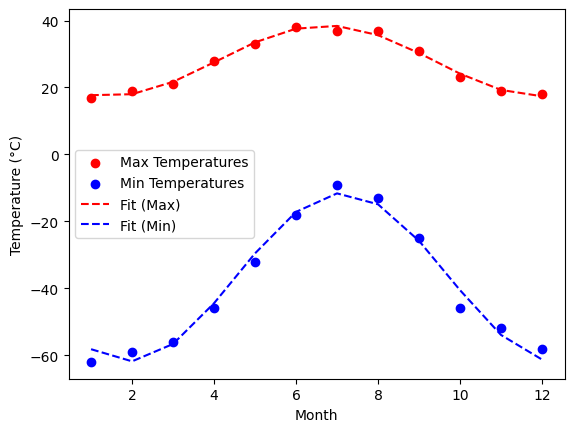

In [4]:
# exercise 10 PART THREE.Curve fitting of temperature in Alaska


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib

# Given data
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plotting the original data
plt.scatter(months, max_temps, color='red', label='Max Temperatures')
plt.scatter(months, min_temps, color='blue', label='Min Temperatures')

# Define a suitable fitting function (you may need to adjust this)
def model_func(months, amplitude, offset, frequency, phase):
    argument = frequency * (months + phase)
    sinusoidal_term = np.sin(argument)
    temperature_estimate = amplitude * sinusoidal_term + offset
    return temperature_estimate

# Curve fitting for max temperatures with improved initial guesses
initial_guess_max = [np.max(max_temps) - np.min(max_temps), np.mean(max_temps), 2 * np.pi / 12, 0]

params_max, covariance_max = curve_fit(model_func, months, max_temps, p0=initial_guess_max)
fit_max = model_func(months, *params_max)
plt.plot(months, fit_max, color='red', linestyle='--', label='Fit (Max)')

# Curve fitting for min temperatures with improved initial guesses
initial_guess_min = [np.max(min_temps) - np.min(min_temps), np.mean(min_temps), 2 * np.pi / 12, 0]

params_min, covariance_min = curve_fit(model_func, months, min_temps, p0=initial_guess_min)
fit_min = model_func(months, *params_min)
plt.plot(months, fit_min, color='blue', linestyle='--', label='Fit (Min)')

# Display the plot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [5]:
# exercise 10 PART FOUR.Fit the residues


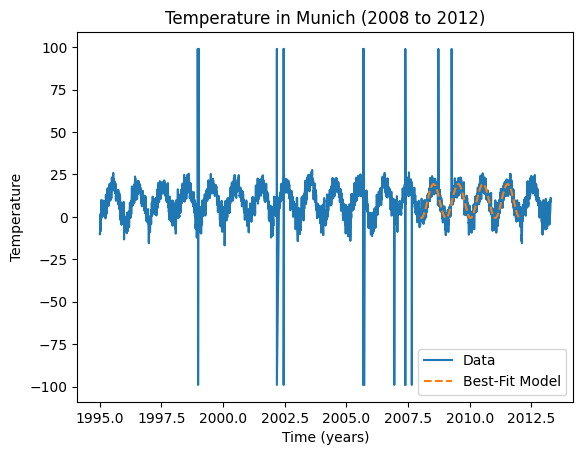

Best-fit parameters:
a: -9.988133684261012
b: -0.23334759673612085
c: 9.384114868067753

Covariance matrix:
[[ 3.22599217e-02 -1.58639754e-07 -5.53231491e-08]
 [-1.58639754e-07  3.23585236e-04 -2.22860451e-08]
 [-5.53231491e-08 -2.22860451e-08  1.61303440e-02]]

Overall average temperature in Munich: 8.946557719712402

Predicted temperature for the coldest time of the year: -0.46910616493949675
Predicted temperature for the hottest time of the year: 9.233601995695821

Comment on the meaning of the b parameter:
The 'b' parameter represents the phase shift of the cosine function. It determines the horizontal shift or delay of the function in time. In the context of temperature data, it could indicate the time at which the temperature reaches a specific phase or turning point in its periodic behavior.


In [7]:
# exercise 10 PART FIVE.Temperatures in Munich


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib

# Function to fit: f(t) = a * cos(2 * pi * t + b) + c
def cosine_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

file_path = "munich_temperatures_average_with_bad_data.txt"

# Load the data from the local file
data = np.loadtxt(file_path, skiprows=3)

# Extract time and temperature columns
time = data[:, 0]
temperature = data[:, 1]

# Filter data for the range 2008 to 2012
mask = (time >= 2008) & (time <= 2012)
time_filtered = time[mask]
temperature_filtered = temperature[mask]

# Perform the curve fit
# Perform the curve fit
initial_guess = [1.0, 0.0, 0.0]  # Example initial guess for the parameters a, b, c
popt, pcov = curve_fit(cosine_function, time_filtered, temperature_filtered, p0=initial_guess)

# Plot the data and the best-fit model
plt.plot(time, temperature, label='Data')
plt.plot(time_filtered, cosine_function(time_filtered, *popt), label='Best-Fit Model', linestyle='--')
plt.xlabel('Time (years)')
plt.ylabel('Temperature')
plt.legend()
plt.title('Temperature in Munich (2008 to 2012)')

# Display the plot
plt.show()

# Display the best-fit parameters and their uncertainties
print("Best-fit parameters:")
print("a:", popt[0])
print("b:", popt[1])
print("c:", popt[2])
print("\nCovariance matrix:")
print(pcov)

# Calculate overall average temperature
average_temperature = np.mean(temperature)
print("\nOverall average temperature in Munich:", average_temperature)

# Calculate the predicted temperature for the coldest and hottest times of the year
coldest_time = np.min(time)
hottest_time = np.max(time)
predicted_coldest = cosine_function(coldest_time, *popt)
predicted_hottest = cosine_function(hottest_time, *popt)
print("\nPredicted temperature for the coldest time of the year:", predicted_coldest)
print("Predicted temperature for the hottest time of the year:", predicted_hottest)

# Comment on the meaning of the b parameter
print("\nComment on the meaning of the b parameter:")
print("The 'b' parameter represents the phase shift of the cosine function. It determines the horizontal shift or delay of the function in time. In the context of temperature data, it could indicate the time at which the temperature reaches a specific phase or turning point in its periodic behavior.")
